# Task 4: Developing an Algorithm to Improve the results from Task 3

The algorithm that was chosen is an implementation of a voting classifier. We used multiple Clustering algorithms to predict the cluster of each data point and each algorithm voted on which cluster the data point belonged to. Using an ensemble technique helped us boost the accuracy of the results as shown below.

In [6]:
from utils.task3_utils import *
from utils.task4_utils import *

import warnings
warnings.filterwarnings('ignore')

import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import SpectralClustering
from kmodes.kmodes import KModes
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, BisectingKMeans

# Dataset 1: Breast Cancer Wisconsin (Diagnostic) Data Set

In [7]:
dataset = 'breast_cancer'
df, target, num_classes = load_data(name=dataset, normalize=False)

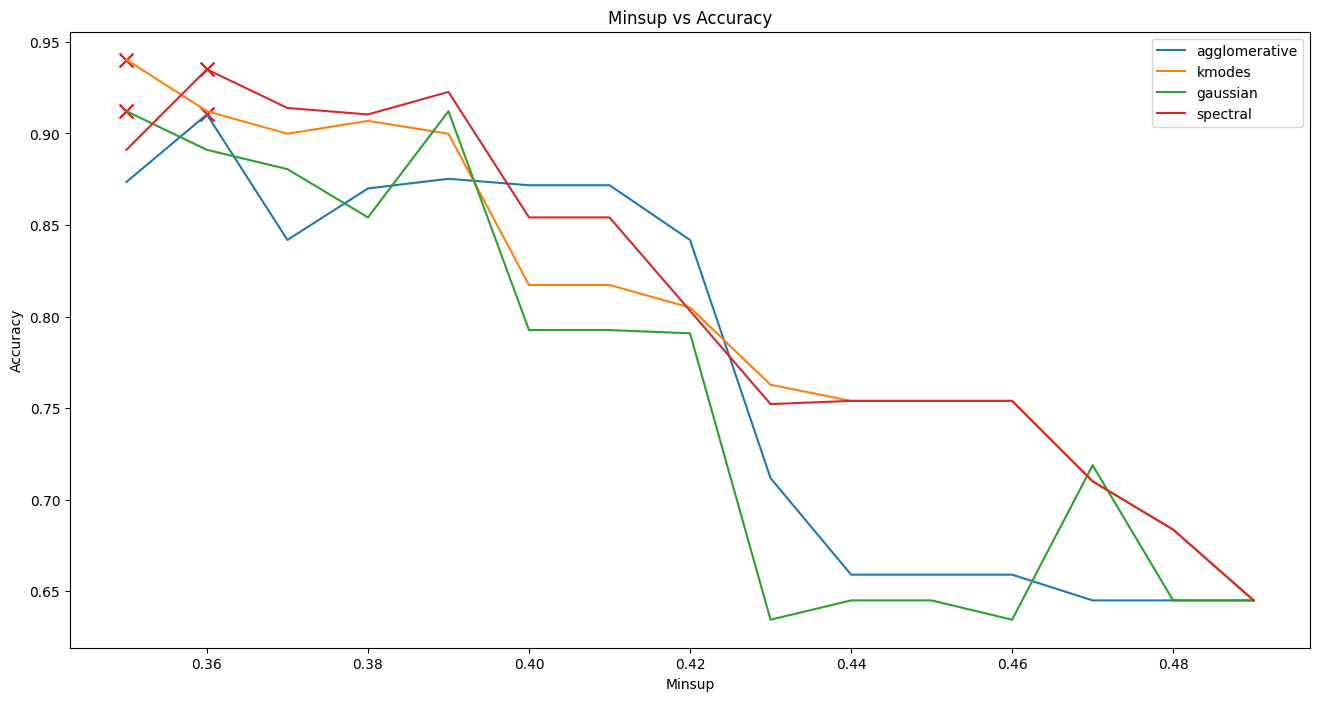

Best minsup found: 0.36



In [8]:
# finding the best minimum support using our clustering algorithms
algos = ['agglomerative', 'kmodes', 'gaussian', 'spectral']
minsup_values = np.arange(0.35, 0.8+0.2, 0.01)
best_minsup = tune_minsup(df, target, num_classes, minsup_values, algos)
print(f'Best minsup found: {best_minsup}\n')

Dataset:	breast_cancer
Num. classes:	2
Num. features:	30
Num. freq-itemsets:	30

Accuracy for voting classifier:	0.9262


Davies Bouldin Score:	1.3783
Silhouette Score:	0.3086


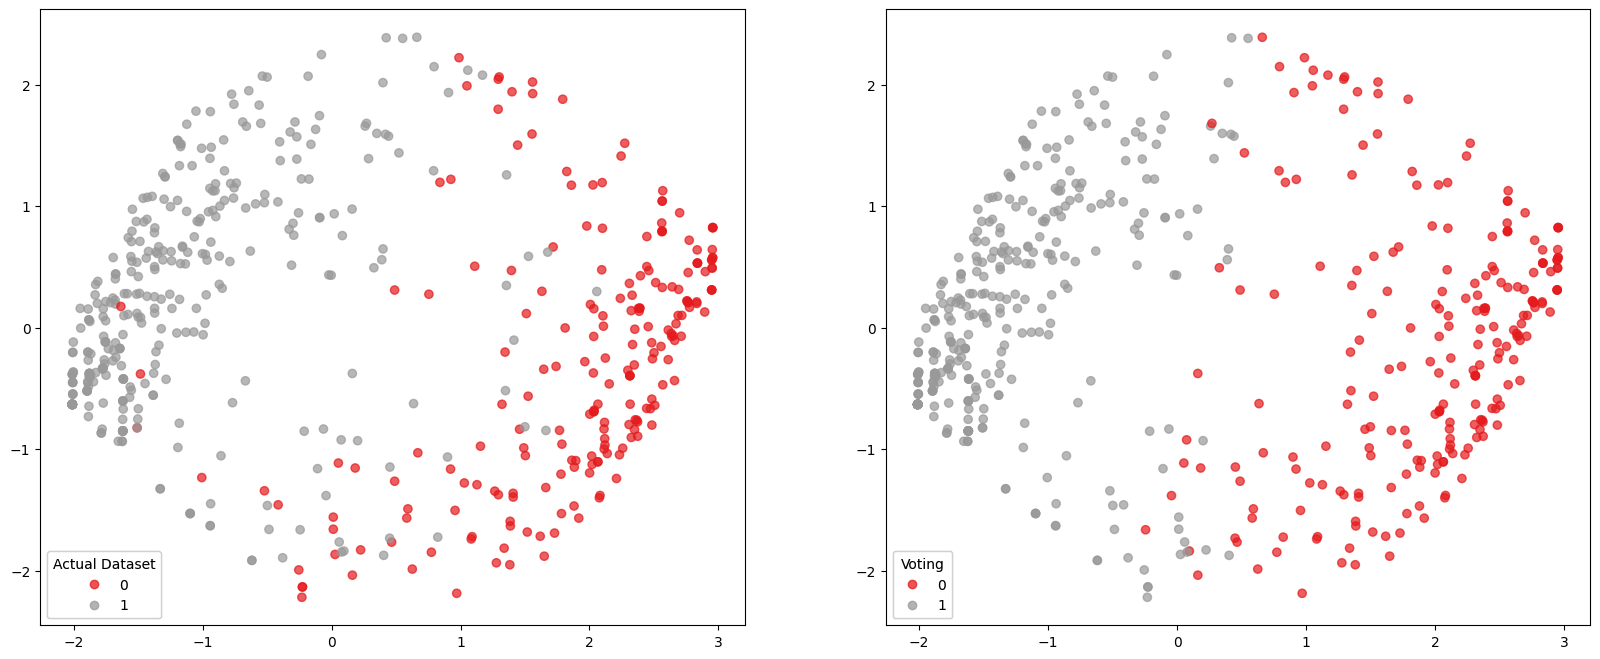

In [9]:
fi = get_frequent_itemsets(df, minsup=best_minsup)
df_new = make_cluster_df(df, fi) #converts the df such that the features are the freuent itemsets and the values are binary

print(f'Dataset:\t{dataset}')
print(f'Num. classes:\t{num_classes}')
print(f'Num. features:\t{df.shape[1]}')
print(f'Num. freq-itemsets:\t{fi.shape[0]}\n')

estimators = [
    AgglomerativeClustering(n_clusters=num_classes, linkage='average'),
    # KMeans(n_clusters=num_classes, init='k-means++'),
    KModes(n_clusters=num_classes, init='Cao', verbose=0),
    GaussianMixture(n_components=num_classes),
    SpectralClustering(n_clusters=num_classes, affinity='nearest_neighbors')
]

estimator_names = ['agglomerative', 
                #    'kmeans', 
                   'kmodes', 'gaussian', 'spectral']

vc = VotingClassifier(estimators, 'hard', estimator_names)
ip = vc.fit_predict(df_new, target) # individual predictions of each estimator
votes = vc.voting(ip, num_classes, len(df_new), target)

evaluate_clusters(votes, target, df_new)
plot_clusters(estimator_names, ip, votes, df_new, target, plot_all=False)

# Dataset 2: NASA KC2

In [10]:
dataset = 'kc2'
df, target, num_classes = load_data(name=dataset, normalize=False)

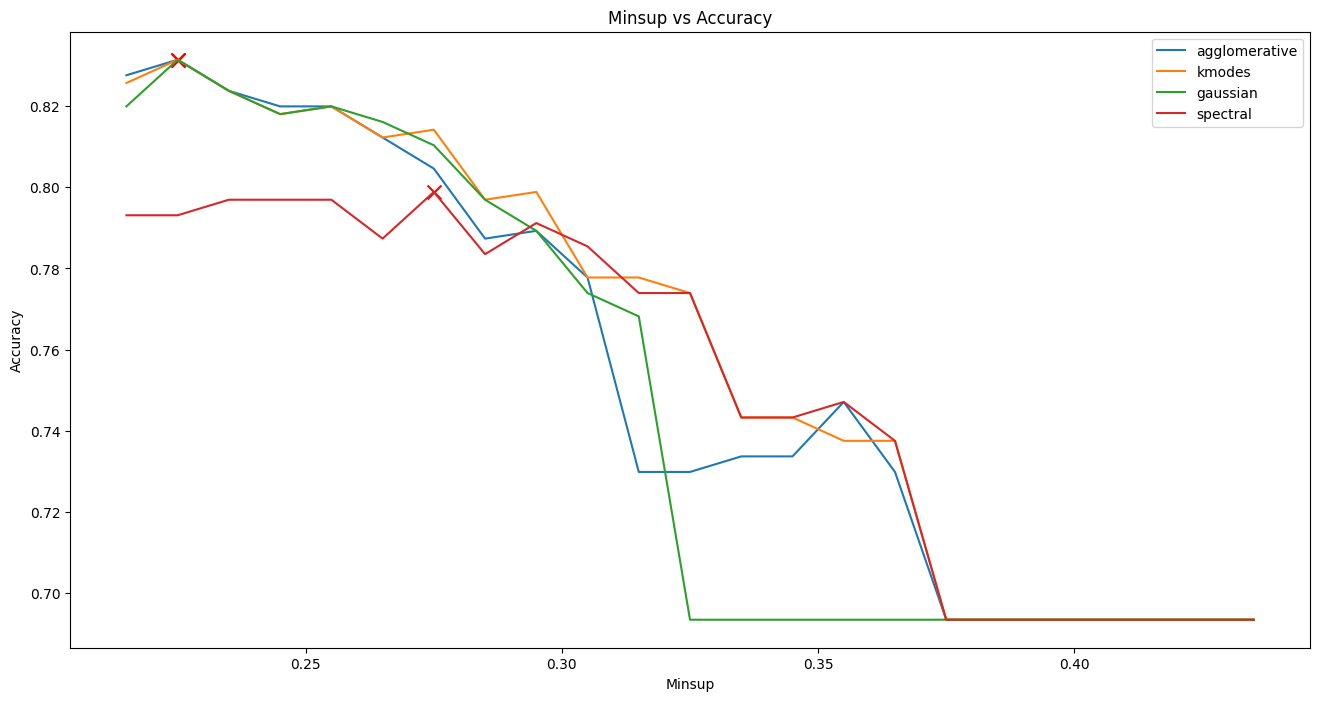

Best minsup found: 0.275



In [11]:
# finding the best minimum support using our clustering algorithms
algos = ['agglomerative', 'kmodes', 'gaussian', 'spectral']
minsup_values = np.arange(0.215, 0.8+0.2, 0.01)
best_minsup = tune_minsup(df, target, num_classes, minsup_values, algos)
print(f'Best minsup found: {best_minsup}\n')

Dataset:	kc2
Num. classes:	2
Num. features:	21
Num. freq-itemsets:	41

Accuracy for voting classifier:	0.8142


Davies Bouldin Score:	0.3402
Silhouette Score:	0.7690


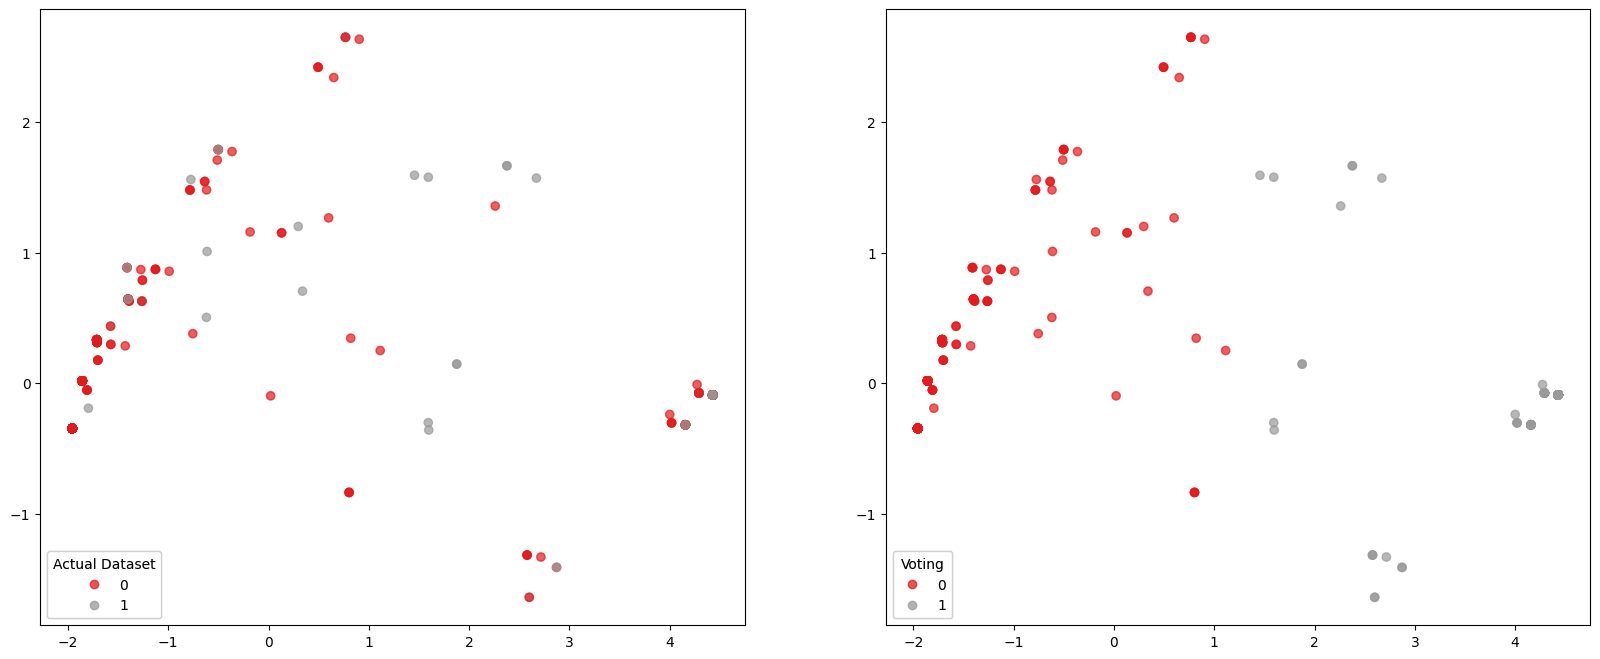

In [12]:
fi = get_frequent_itemsets(df, minsup=best_minsup)
df_new = make_cluster_df(df, fi) #converts the df such that the features are the freuent itemsets and the values are binary

print(f'Dataset:\t{dataset}')
print(f'Num. classes:\t{num_classes}')
print(f'Num. features:\t{df.shape[1]}')
print(f'Num. freq-itemsets:\t{fi.shape[0]}\n')

estimators = [
    AgglomerativeClustering(n_clusters=num_classes, linkage='average'),
    # KMeans(n_clusters=num_classes, init='k-means++'),
    KModes(n_clusters=num_classes, init='Cao', verbose=0),
    GaussianMixture(n_components=num_classes),
    SpectralClustering(n_clusters=num_classes, affinity='nearest_neighbors')
]

estimator_names = ['agglomerative', 
                #    'kmeans', 
                   'kmodes', 'gaussian', 'spectral']

vc = VotingClassifier(estimators, 'hard', estimator_names)
ip = vc.fit_predict(df_new, target)# individual predictions of each estimator
votes = vc.voting(ip, num_classes, len(df_new), target)

evaluate_clusters(votes, target, df_new)
plot_clusters(estimator_names, ip, votes, df_new, target, plot_all=False)